In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ranksums

In [16]:
SR=pd.read_csv('features/SR.csv').dropna()
AFIB=pd.read_csv("features/AFIB.csv").dropna()



<BarContainer object of 2 artists>

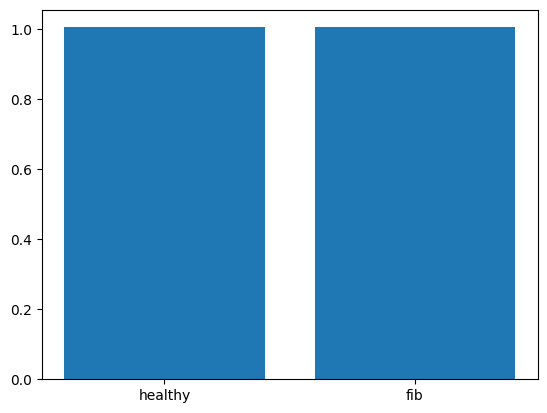

In [17]:
plt.bar(['healthy','fib'],[SR[' Lam_max'].mean(),AFIB[' Lam_max'].mean()])

In [21]:
SR.columns

Index(['R_N', ' R_M', ' R_P', ' Lam_min', ' Lam_max', ' M_s1', ' M_s2',
       ' M_s3', ' M_s4', ' M_s5', ' M_s6', ' M_s7', ' M_s8', ' M_s9', ' M_s10',
       ' M_s11', ' M_s12', ' P_s1', ' P_s2', ' P_s3', ' P_s4', ' P_s5',
       ' P_s6', ' P_s7', ' P_s8', ' P_s9', ' P_s10', ' P_s11', ' P_s12',
       ' M_u1', ' M_u2', ' M_u3', ' M_u4', ' M_u5', ' M_u6', ' M_u7', ' M_u8',
       ' M_u9', ' M_u10', ' M_u11', ' M_u12', ' P_u1', ' P_u2', ' P_u3',
       ' P_u4', ' P_u5', ' P_u6', ' P_u7', ' P_u8', ' P_u9', ' P_u10',
       ' P_u11', ' P_u12'],
      dtype='object')

In [19]:
results = {}

for column in SR.columns:
    # Extract the values for the current feature
    group1 = SR[column]
    group2 = AFIB[column]
    
    # Perform the Wilcoxon rank-sum test
    statistic, p_value = ranksums(group1, group2)
    
    # Store the results
    results[column] = {
        'Statistic': statistic,
        'P-value': p_value,
        'Significant':'True' if p_value<0.05 else 'False'
    }

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results).T
print("\nWilcoxon Rank-Sum Test Results:")
print(results_df)


Wilcoxon Rank-Sum Test Results:
          Statistic   P-value Significant
R_N       -6.677685       0.0        True
 R_M       3.040109  0.002365        True
 R_P       4.332859  0.000015        True
 Lam_min        0.0       1.0       False
 Lam_max -10.390551       0.0        True
 M_s1     25.936159       0.0        True
 M_s2     31.044917       0.0        True
 M_s3      6.865935       0.0        True
 M_s4     37.524942       0.0        True
 M_s5      8.925666       0.0        True
 M_s6     16.876055       0.0        True
 M_s7      6.313419       0.0        True
 M_s8      3.107093  0.001889        True
 M_s9    -16.724144       0.0        True
 M_s10   -15.274853       0.0        True
 M_s11   -26.686482       0.0        True
 M_s12   -12.759259       0.0        True
 P_s1     -3.300621  0.000965        True
 P_s2     -3.365158  0.000765        True
 P_s3     -3.959194  0.000075        True
 P_s4     -1.033987  0.301142       False
 P_s5     -2.442256  0.014596        True
 